In [1]:
# Improve by ChatGPT & GitHub Copilot
# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/requierements.ipynb
# Loading the data 
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/Exercises_on_CALEDO/data_loading.ipynb #january 2014

# Exercises on CALEDO

## Grid & Plotting

### Downscaling

Downscale spatially the SSH field to 1/10th degree (by using [xarray.coarsen](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.coarsen.html) or [xarray.interp](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interp.html))

In [2]:
from pyproj import Proj, transform
import numpy as np

# Assuming these are the extracted latitude and longitude values
lat = SSH_01['nav_lat'].values
lon = SSH_01['nav_lon'].values

# Calculate median longitude to determine UTM zone
median_lon = np.median(lon)

# UTM zone calculation (simplified approximation)
utm_zone = int(np.floor((median_lon + 180) / 6) + 1)
is_northern = np.median(lat) > 0

# Define geographic and UTM projection correctly for Southern Hemisphere
geodetic = Proj(proj='latlong', datum='WGS84')
utm = Proj(proj='utm', zone=utm_zone, datum='WGS84', south=not is_northern)  # Correctly set based on hemisphere

# Transform coordinates
x, y = transform(geodetic, utm, lon, lat)

NameError: name 'transform' is not defined

In [4]:
# Optionally, show a small sample of the transformed coordinates to verify
x_sample, y_sample = x[:5, :5], y[:5, :5]
x_sample, y_sample, utm_zone, is_northern

(array([[-63241.77354877, -61611.35447037, -59980.96098411,
         -58350.59301596, -56720.25049187],
        [-63320.71265931, -61690.06269152, -60059.43834027,
         -58428.83953146, -56798.25600585],
        [-63399.61516141, -61768.7344103 , -60137.87930013,
         -58507.04975671, -56876.24570586],
        [-63478.49134607, -61847.37988759, -60216.29409445,
         -58585.2338924 , -56954.19920716],
        [-63557.3514851 , -61925.99910396, -60294.68270389,
         -58663.39191922, -57032.12667562]]),
 array([[6800049.08766546, 6800128.30786143, 6800207.29601927,
         6800286.05216347, 6800364.57631842],
        [6801671.73469914, 6801750.92937795, 6801829.89209236,
         6801908.62286685, 6801986.90984995],
        [6803294.38179239, 6803373.55093335, 6803452.48818369,
         6803531.19356789, 6803609.66711037],
        [6804917.24083438, 6804996.38441345, 6805075.29617575,
         6805153.97614578, 6805232.42434794],
        [6806540.5237143 , 6806619.4298182

In [6]:
# Load the dataset
data = SSH_01

# Assuming nav_lat and nav_lon are 2D arrays of the same shape as your data variable (e.g., 'zos')
lat = data['nav_lat'].values
lon = data['nav_lon'].values

# Transform to UTM (example uses WGS 84 and a specific zone; adjust as necessary)
transformer = Transformer.from_crs("epsg:4326", "epsg:32633", always_xy=True)  # Example: UTM zone 33N
x, y = transformer.transform(lon, lat)

# Assign the transformed coordinates back to the dataset (or a copy of it)
data = data.assign_coords({"x_utm": (("y", "x"), x), "y_utm": (("y", "x"), y)})

# Now, prepare for interpolation
# Define your target grid in UTM coordinates (this example assumes you've calculated these)
x_utm_target = np.linspace(x.min(), x.max(), num=100)  # Example target grid
y_utm_target = np.linspace(y.min(), y.max(), num=100)

# Interpolate using the new UTM coordinates
# Note: We'll interpolate a single variable ('zos') as an example; adjust as needed
zos_interpolated = data['zos'].interp(x_utm=x_utm_target, y_utm=y_utm_target, method='linear')

ValueError: Dimensions {'x_utm', 'y_utm'} do not exist. Expected one or more of Frozen({'y': 853, 'x': 788, 'time_counter': 744})

In [7]:
# Load your dataset
data = SSH_01

# Assuming you've already calculated x_utm and y_utm, which are Cartesian coordinates
# For demonstration, let's assume x_utm and y_utm are already defined as 2D arrays of the same shape as data['nav_lat'] and data['nav_lon']
# Example: x_utm, y_utm = your_transformation_function(data['nav_lon'], data['nav_lat'])

# Assign these Cartesian coordinates to the dataset
data = data.assign_coords(x_utm=(('y', 'x'), x_utm), y_utm=(('y', 'x'), y_utm))

# Define your target grid for interpolation
# This should be based on the desired resolution and range in your Cartesian coordinate system
x_utm_target = np.linspace(x_utm.min(), x_utm.max(), num=desired_number_of_points)
y_utm_target = np.linspace(y_utm.min(), y_utm.max(), num=desired_number_of_points)

# Perform interpolation using the Cartesian coordinates
# Note: This example interpolates along both x_utm and y_utm dimensions. Adjust as needed for your specific case
zos_interpolated = data['zos'].interp(x_utm=x_utm_target, y_utm=y_utm_target, method='linear')

# zos_interpolated now contains the interpolated data on your new Cartesian grid

NameError: name 'x_utm' is not defined

In [2]:
# Defining new latitude and longitude coordinates within the given boundaries
# Seems necessary for mapping the new coordinates need it on xarray.interp

lat_min, lat_max = SSH_01.nav_lat.min().item(), SSH_01.nav_lat.max().item()
lon_min, lon_max = SSH_01.nav_lon.min().item(), SSH_01.nav_lon.max().item()

new_lats = np.arange(lat_min, lat_max, 0.1)  # 1/10th degree step for latitude
new_lons = np.arange(lon_min, lon_max, 0.1)  # 1/10th degree step for longitude

# To interpolate the data to the new grid
# method: "linear", "nearest", "zero", "slinear", "quadratic", "cubic", "polynomial", default: "linear"
#SSH_01_interp = SSH_01.interp(y=("nav_lat", new_lats), x=("nav_lon", new_lons), method='linear')
SSH_01_interp= SSH_01.interp(y=new_lats, x=new_lons, method='linear')

#Verifying the new dimensions
print("Verifying the new dimensions:")
print("SSH_01_interp: ", SSH_01_interp.dims)
print("SSH_01 original : ", SSH_01.dims)

#Verifying the new coordinates
print("Verifying the new coordinates:")
print(SSH_01_interp.nav_lat)
print(SSH_01_interp.nav_lon)


Verifying the new dimensions:
SSH_01_interp:  Frozen({'y': 132, 'x': 132, 'time_counter': 744, 'axis_nbounds': 2})
SSH_01 original :  Frozen({'y': 853, 'x': 788, 'time_counter': 744, 'axis_nbounds': 2})
Verifying the new coordinates:
<xarray.DataArray 'nav_lat' (y: 132, x: 132)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    nav_lat  (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    nav_lon  (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
<xarray.DataArray 'nav_lon' (y: 132, x: 132)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, n

In [5]:
SSH_01

<xarray.Dataset>
Dimensions:              (y: 853, x: 788, time_counter: 744, axis_nbounds: 2)
Coordinates:
    nav_lat              (y, x) float32 -28.8 -28.8 -28.8 ... -15.7 -15.7 -15.7
    nav_lon              (y, x) float32 159.2 159.2 159.3 ... 172.3 172.3 172.3
  * time_counter         (time_counter) datetime64[ns] 2014-01-01T00:30:00 .....
    time_instant         (time_counter) datetime64[ns] ...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    zos                  (time_counter, y, x) float32 ...
Attributes:
    name:         1_/scratch/cnt0024/ige2071/brodeau/NEMO/TROPICO12/TROPICO12...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Jul-30 09:28:08 GMT
    uuid:         dfea4106-852e-44e9-a456-80ebfbca9f95
    history:      Fri Feb  2 16:39:45 2024: /lus/home/CT1/ige2071/aalbert/.co...
    NCO:          netCDF Operators version 5.1.4 (Homepage = http://nco.sf.ne...

In [5]:
#print(lat_min, lat_max)
#print(new_lats, new_lons)

SSH_01.nav_lat

<xarray.DataArray 'nav_lat' (y: 853, x: 788)>
array([[-28.803944, -28.803944, -28.803944, ..., -28.803944, -28.803944,
        -28.803944],
       [-28.789337, -28.789337, -28.789337, ..., -28.78934 , -28.78934 ,
        -28.78934 ],
       [-28.77473 , -28.77473 , -28.77473 , ..., -28.774733, -28.774733,
        -28.774733],
       ...,
       [-15.731853, -15.731853, -15.731853, ..., -15.731853, -15.731853,
        -15.731853],
       [-15.71581 , -15.71581 , -15.71581 , ..., -15.71581 , -15.71581 ,
        -15.71581 ],
       [-15.699765, -15.699765, -15.699766, ..., -15.699766, -15.699766,
        -15.699766]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 -28.8 -28.8 -28.8 -28.8 ... -15.7 -15.7 -15.7 -15.7
    nav_lon  (y, x) float32 159.2 159.2 159.3 159.3 ... 172.3 172.3 172.3 172.3
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

In [6]:
SSH_01_interp.nav_lat

<xarray.DataArray 'nav_lat' (y: 132, x: 132)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    nav_lat  (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    nav_lon  (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

Adjusted Interpolation nav_lat: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Adjusted Interpolation nav_lon: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


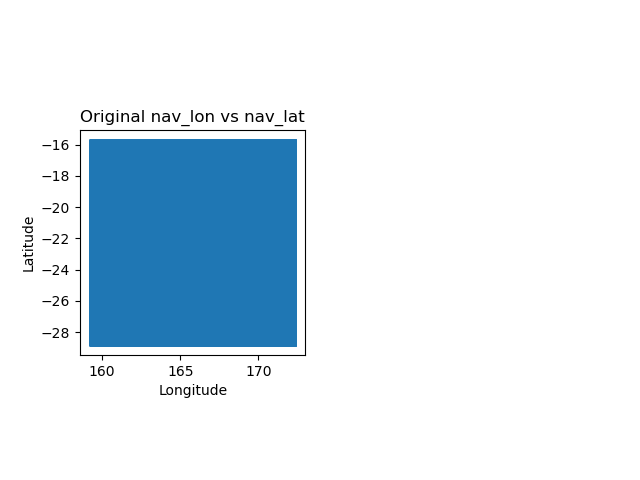

In [17]:
# Verify the coverage and distribution of original nav_lat and nav_lon
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(SSH_01.nav_lon.values.flatten(), SSH_01.nav_lat.values.flatten(), s=1)
plt.title('Original nav_lon vs nav_lat')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the aspect of the plot to be equal
ax = plt.gca()  # Get the current axes
ax.set_aspect('equal')

# Adjust the interpolation grid if needed based on the coverage visualization
# Potentially adjust interpolation method or parameters
SSH_01_interp_adjusted = SSH_01.interp(y=("nav_lat", new_lats), x=("nav_lon", new_lons), method='nearest')

# Re-examine the results
print("Adjusted Interpolation nav_lat:", SSH_01_interp_adjusted.nav_lat.values)
print("Adjusted Interpolation nav_lon:", SSH_01_interp_adjusted.nav_lon.values)


Probando algo nuevo

In [3]:
# Determine the resolution of your grid by examining the changes in latitude and longitude
lat_resolution = (SSH_01.nav_lat[-1, 0] - SSH_01.nav_lat[0, 0]) / (SSH_01.dims['y'] - 1)
lon_resolution = (SSH_01.nav_lon[0, -1] - SSH_01.nav_lon[0, 0]) / (SSH_01.dims['x'] - 1)

# Calculate new indices based on 1/10th degree spacing, assuming linear scaling
# Note: Adjust the formula if your calculation for lat/lon resolution is different
new_y = np.arange(0, SSH_01.dims['y'] - 1, lat_resolution / 0.1)
new_x = np.arange(0, SSH_01.dims['x'] - 1, lon_resolution / 0.1)

# Perform interpolation
SSH_01_interp = SSH_01.interp(y=new_y, x=new_x, method='linear')


KeyboardInterrupt: 

### Upscaling

Upscale the time coordinate of the SSH field over 1 day to obtain 10 minutes timestep fields using the cubic interpolation method (use [xarray.interp](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interp.html)).

In [1]:
# Assuming SSH_01_first_day is your dataset for the first day

# Step 1: Create a new time coordinate with 10-minute intervals for the first day of January 2014
new_time = pd.date_range(start='2014-01-01 00:30', end='2014-01-01 23:30', freq='10T')

# Step 2: Interpolate the SSH_01_first_day dataset to the new time coordinate
SSH_01_first_day_upscaled = SSH_01_first_day.interp(time_counter=new_time, method='cubic')

NameError: name 'pd' is not defined

In [ ]:
# Coordinates of the point of interest
lon_target = 167.0  # Longitude E 167°
lat_target = -24.0  # Latitude S 24° (negative for South)

# Find the closest grid point
abs_diff_lon = np.abs(SSH_01.nav_lon - lon_target) # Absolute difference to target longitude
abs_diff_lat = np.abs(SSH_01.nav_lat - lat_target) # Absolute difference to target latitude
min_diff = np.sqrt(abs_diff_lon**2 + abs_diff_lat**2)  # Euclidean distance, taking into account both dimensions
closest_point = np.unravel_index(min_diff.argmin(), SSH_01.nav_lon.shape) # Tuple of indices for the closest point

# Extract the SSH time series data for the closest grid point from both datasets
ssh_time_series_original = SSH_01_first_day.zos[:, closest_point[0], closest_point[1]] # Original SSH time series
ssh_time_series_upscaled = SSH_01_first_day_upscaled.zos[:, closest_point[0], closest_point[1]] # Upscaled SSH time series

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(SSH_01_first_day.time_counter, ssh_time_series_original, label='Original SSH', marker='o', markersize=4, linestyle='-', linewidth=0, zorder=1)
plt.plot(SSH_01_first_day_upscaled.time_counter, ssh_time_series_upscaled, label='Upscaled SSH', marker='x', markersize=4, linestyle='-', linewidth=0, zorder=0)
plt.xlabel('Time')
plt.ylabel('SSH (m)')
plt.title('SSH Time Series Comparison at Lon: E 167°, Lat: S 24°')
plt.legend()
plt.grid(True)

# Adjusting x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1)) # Set the interval to 1 hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) # Set the date format to be displayed
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


### Change coordinate system

Change the longitude coordinate system (from degree east to -180 / +180)

In [2]:
# Check if longitude needs to be transformed from 0-360 to -180 to 180
if 'lon' in SSH.variables:
    lon_name = 'lon'
elif 'longitude' in SSH.variables:
    lon_name = 'longitude'
else:
    raise ValueError("Longitude variable not found in dataset")

# Transform longitude if necessary
if (SSH[lon_name] > 180).any():
    SSH[lon_name] = ((SSH[lon_name] + 180) % 360) - 180
    SSH = SSH.sortby(SSH[lon_name])

# Save the modified dataset to a new NetCDF file
output_file = '/home/riverama/Documents/Exercises_on_CALEDO/resultado_180.nc'
SSH.to_netcdf(output_file)

print(f"Modified file saved to: {output_file}")


ValueError: Longitude variable not found in dataset